In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
data = pd.read_csv("/Users/junhyuk/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/DSL 기초세션/EDA/data.csv")

# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

#필요한 열만으로 편집
data = data[['age_group','education','familysize', 'married','urban','tp09', 'tp10']]

In [6]:
#점수 변환
data['tp09']=7-data['tp09']
data['tp10']=7-data['tp10']

#50대 이상 합치기
data['age_group'] = data['age_group'].apply(lambda x:'+50s' 
                                            if x in ['50s','60s','+70s'] else x)

#가족 수가 6이상인걸 하나로 합치기
data.familysize=data.familysize.apply(lambda x:'+6'if x >=6 else x)

In [7]:
#무응답 제거
tp09 = data[data['tp09']!=0]
print((tp09['tp09']==0).sum())

tp10 = data[data['tp10']!=0]
print((tp10['tp10']==0).sum())

0
0


In [31]:
#tp09 pivot table 생성
tp09_education_pivot = pd.pivot_table(data=tp09, index='education', columns='tp09', aggfunc='size')
tp09_education = tp09_education_pivot.div(tp09_education_pivot.sum(axis=1), axis=0) * 100

tp09_married_pivot = pd.pivot_table(data=tp09, index='married', columns='tp09', aggfunc='size')
tp09_married = tp09_married_pivot.div(tp09_married_pivot.sum(axis=1), axis=0) * 100

tp09_familysize_pivot = pd.pivot_table(data=tp09, index='familysize', columns='tp09', aggfunc='size')
tp09_familysize = tp09_familysize_pivot.div(tp09_familysize_pivot.sum(axis=1), axis=0) * 100

tp09_urban_pivot = pd.pivot_table(data=tp09, index='urban', columns='tp09', aggfunc='size')
tp09_urban = tp09_urban_pivot.div(tp09_urban_pivot.sum(axis=1), axis=0) * 100

In [32]:
#tp10 pivot table 생성
tp10_education_pivot = pd.pivot_table(data=tp10, index='education', columns='tp10', aggfunc='size')
tp10_education = tp10_education_pivot.div(tp10_education_pivot.sum(axis=1), axis=0) * 100

tp10_married_pivot = pd.pivot_table(data=tp10, index='married', columns='tp10', aggfunc='size')
tp10_married = tp10_married_pivot.div(tp10_married_pivot.sum(axis=1), axis=0) * 100

tp10_familysize_pivot = pd.pivot_table(data=tp10, index='familysize', columns='tp10', aggfunc='size')
tp10_familysize = tp10_familysize_pivot.div(tp10_familysize_pivot.sum(axis=1), axis=0) * 100

tp10_urban_pivot = pd.pivot_table(data=tp10, index='urban', columns='tp10', aggfunc='size')
tp10_urban = tp10_urban_pivot.div(tp10_urban_pivot.sum(axis=1), axis=0) * 100

In [33]:
# 교육수준, 유년기배경 무응답 삭제
tp09_education.drop([0], inplace=True)
tp10_education.drop([0], inplace=True)
tp09_urban.drop([0], inplace=True)
tp10_urban.drop([0], inplace=True)

In [25]:
#한글 안깨지게
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [12]:
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['NanumGothic']


In [13]:
col=['#2913E8','#5789F7','#A0CBFF','#5271FF','#57A2F7','#2ECBFF','#7214FF','#8771FF','#892EE8']

# 교육수준
## tp09

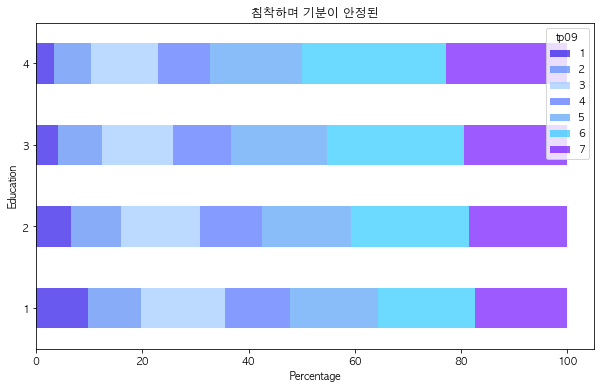

In [35]:
tp09_education.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Education')
plt.title('침착하며 기분이 안정된')
plt.show()

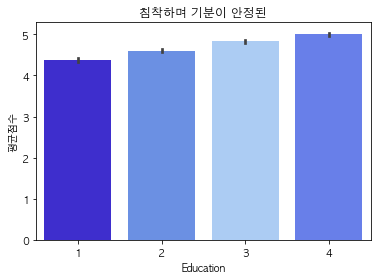

In [48]:
data_tp09_edu = data[data['education']!=0]
sns.barplot(data = data_tp09_edu, x='education', y='tp09', estimator=np.mean, palette=col)
plt.xlabel('Education')
plt.ylabel('평균점수')
plt.title('침착하며 기분이 안정된')
plt.show()

## tp10

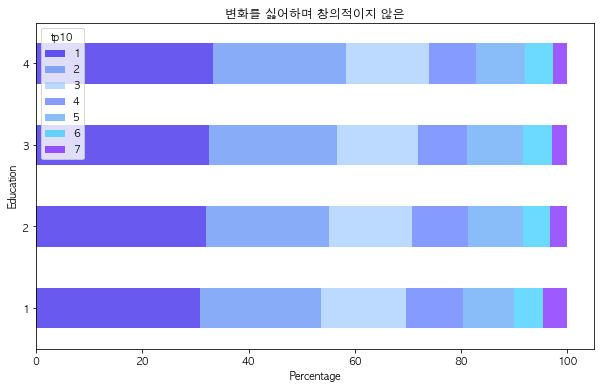

In [54]:
tp10_education.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Education')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

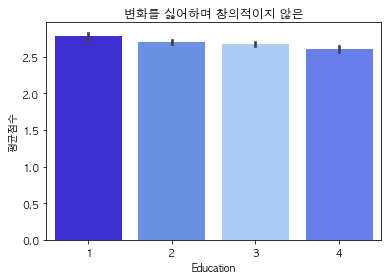

In [55]:
data_tp10_edu = data[data['education']!=0]
sns.barplot(data = data_tp10_edu, x='education', y='tp10', estimator=np.mean, palette=col)
plt.xlabel('Education')
plt.ylabel('평균점수')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

# 결혼유무
## tp09

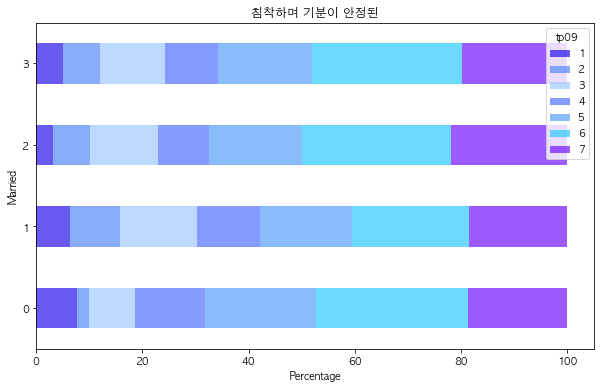

In [111]:
tp09_married.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Married')
plt.title('침착하며 기분이 안정된')
plt.show()

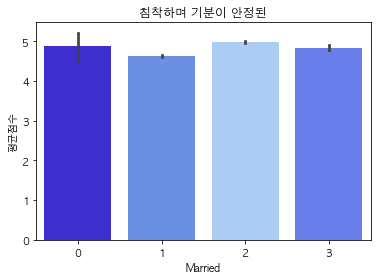

In [51]:
sns.barplot(data = data, x='married', y='tp09', estimator=np.mean, palette=col)
plt.xlabel('Married')
plt.ylabel('평균점수')
plt.title('침착하며 기분이 안정된')
plt.show()

## tp10

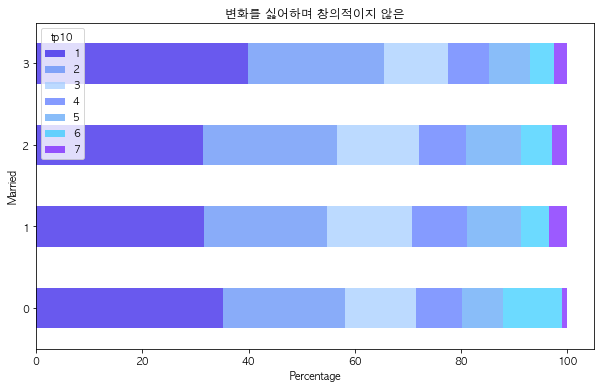

In [53]:
tp10_married.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Married')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

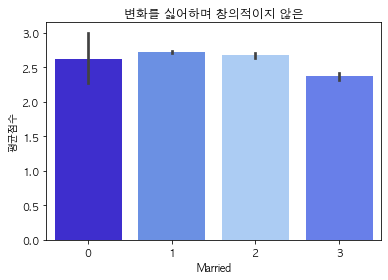

In [112]:
sns.barplot(data = data, x='married', y='tp10', estimator=np.mean, palette=col)
plt.xlabel('Married')
plt.ylabel('평균점수')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

# 유년기 배경
## tp09

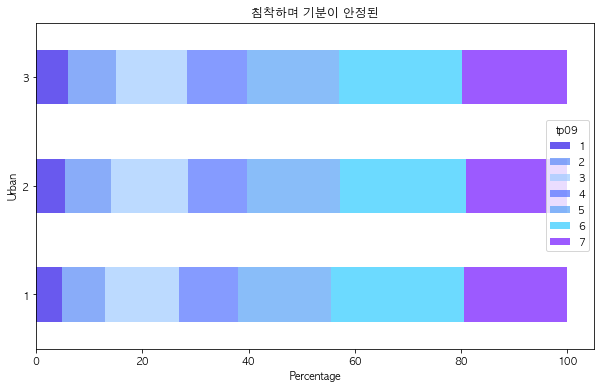

In [84]:
tp09_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Urban')
plt.title('침착하며 기분이 안정된')
plt.show()

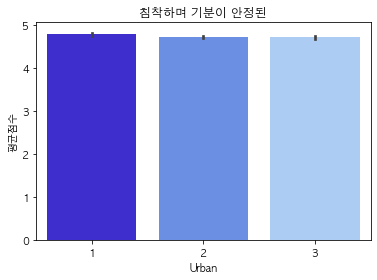

In [85]:
data_tp09_urban = data[data['urban']!=0]
sns.barplot(data = data_tp09_urban, x='urban', y='tp09', estimator=np.mean, palette=col)
plt.xlabel('Urban')
plt.ylabel('평균점수')
plt.title('침착하며 기분이 안정된')
plt.show()

## tp10

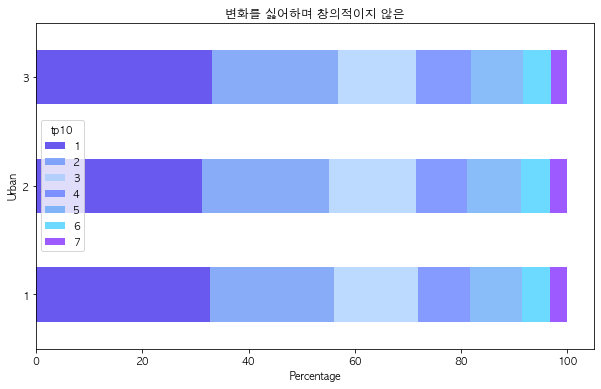

In [59]:
tp10_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('Urban')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

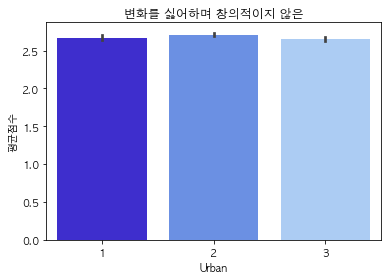

In [81]:
data_tp10_urban = data[data['urban']!=0]
sns.barplot(data = data_tp10_urban, x='urban', y='tp10', estimator=np.mean,palette=col)
plt.xlabel('Urban')
plt.ylabel('평균점수')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

# 가족구성원 수
## tp09

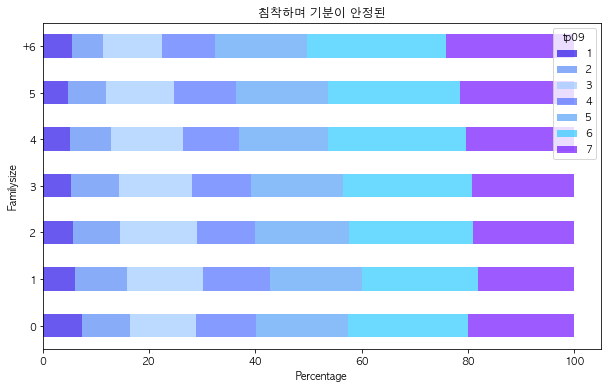

In [62]:
tp09_familysize.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7, color=col)
plt.xlabel('Percentage')
plt.ylabel('Familysize')
plt.title('침착하며 기분이 안정된')
plt.show()

In [75]:
mean_score = data.groupby(['familysize'])['tp09'].mean().to_frame().sort_values(by='tp09')

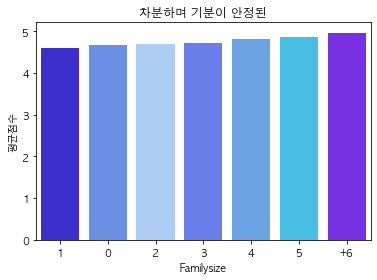

In [76]:
sns.barplot(data = mean_score, x=mean_score.index, y='tp09', palette=col)
plt.xlabel('Familysize')
plt.ylabel('평균점수')
plt.title('차분하며 기분이 안정된')
plt.show()

## tp10

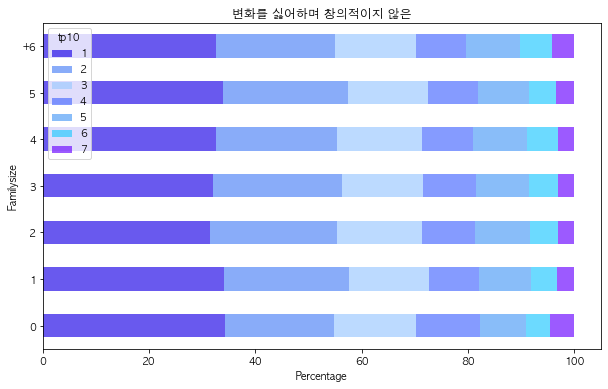

In [70]:
tp10_familysize.plot(kind='barh', figsize=(10,6),stacked=True, alpha = 0.7, color=col)
plt.xlabel('Percentage')
plt.ylabel('Familysize')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

In [71]:
mean_score = data.groupby(['familysize'])['tp10'].mean().to_frame().sort_values(by='tp10')

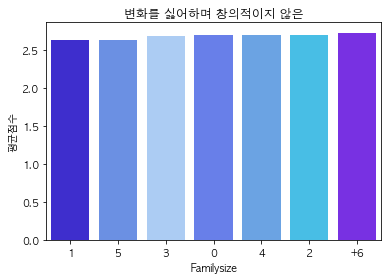

In [73]:
sns.barplot(data = mean_score, x=mean_score.index, y='tp10', palette=col)
plt.xlabel('Familysize')
plt.ylabel('평균점수')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

# 연령대별 질문 응답 분포
# tp09

In [101]:
age = ['10s','20s','30s','40s','+50s']

In [91]:
tp09_pivot = pd.pivot_table(data=tp09, index='age_group', columns='tp09',
              aggfunc='size')

In [94]:
tp09_pivot = tp09_pivot.div(tp09_pivot.sum(axis=1), axis=0) * 100

In [102]:
tp09_pivot = tp09_pivot.reindex(age)

Text(0.5, 1.0, '차분하며 기분이 안정된')

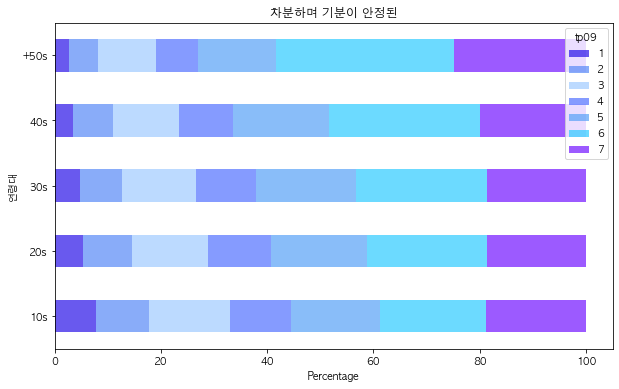

In [103]:
tp09_pivot.plot(kind='barh', figsize=(10,6), stacked=True, 
                color=col,alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('차분하며 기분이 안정된')

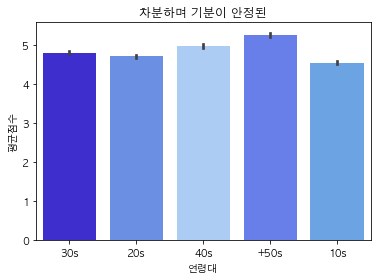

In [109]:
sns.barplot(data = tp09, x='age_group', y='tp09', estimator=np.mean,palette=col)
plt.xlabel('연령대')
plt.ylabel('평균점수')
plt.title('차분하며 기분이 안정된')
plt.show()

## tp10

Text(0.5, 1.0, '변화를 싫어하며 창의적이지 않은')

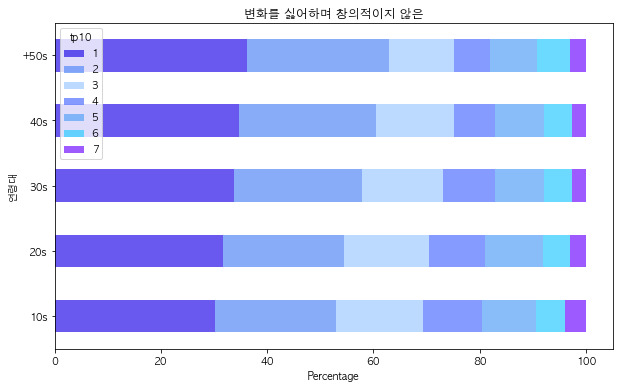

In [108]:
tp10_pivot = pd.pivot_table(data=tp10, index='age_group', columns='tp10',
              aggfunc='size')

tp10_pivot = tp10_pivot.div(tp10_pivot.sum(axis=1), axis=0) * 100

tp10_pivot = tp10_pivot.reindex(age)

tp10_pivot.plot(kind='barh', figsize=(10,6), stacked=True, 
                color=col,alpha =0.7)

plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('변화를 싫어하며 창의적이지 않은')

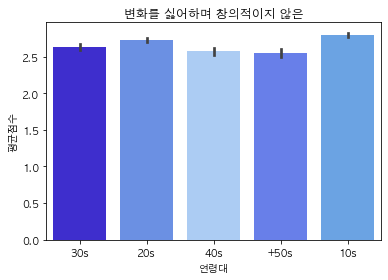

In [110]:
sns.barplot(data = tp09, x='age_group', y='tp10', estimator=np.mean,palette=col)
plt.xlabel('연령대')
plt.ylabel('평균점수')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()